In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Импортируем необходимые библиотеки и присваиваем им сокращенные названия.

In [2]:
df = pd.read_csv('dataa.csv', sep=',')

Импортируем файл с данными используя библиотеку пандас.

In [3]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount
0,Male,No,0.0,Graduate,No,5849,0.0,360.0,1.0,NaN
1,Male,Yes,1.0,Graduate,No,4583,1508.0,360.0,1.0,128.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,360.0,1.0,66.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,360.0,1.0,120.0
4,Male,No,0.0,Graduate,No,6000,0.0,360.0,1.0,141.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,360.0,1.0,71.0
610,Male,Yes,3.0,Graduate,No,4106,0.0,180.0,1.0,40.0
611,Male,Yes,1.0,Graduate,No,8072,240.0,360.0,1.0,253.0
612,Male,Yes,2.0,Graduate,No,7583,0.0,360.0,1.0,187.0


Для построения модели прогнозирования суммы кредита были использованы такие факторы как пол, семейное положение, количество детей, образование, вид занятости, доход, того кто берет кредит, доход co-applicant (со-заявителя), срок погашения, кредитная итсория. Количество наблюдений 614, количество факторов 9, из них 5 количественные, 4 качественные.

In [4]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount
count,599.000000,614.000000,614.000000,600.00000,564.000000,592.000000
mean,0.762938,5403.459283,1621.245798,342.00000,0.842199,146.412162
std,1.015216,6109.041673,2926.248369,65.12041,0.364878,85.587325
min,0.000000,150.000000,0.000000,12.00000,0.000000,9.000000
25%,0.000000,2877.500000,0.000000,360.00000,1.000000,100.000000
50%,0.000000,3812.500000,1188.500000,360.00000,1.000000,128.000000
75%,2.000000,5795.000000,2297.250000,360.00000,1.000000,168.000000
max,3.000000,81000.000000,41667.000000,480.00000,1.000000,700.000000


Описываем основные статистики наших данных. Можем видеть среднее значение по каждой переменной, стандартное отклонение, минимум, максимум и сколько попадает в 25%, 50% и 75%.

In [5]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
CoapplicantIncome,0,0.000000
ApplicantIncome,0,0.000000
Education,0,0.000000


Проверяем наличие пропусков, они присутствуют.

In [6]:
def fill_missing_num(x):
    num_var = list(x._get_numeric_data().columns)
    for col_names in num_var:        
        prep_med = SimpleImputer(missing_values=np.nan, strategy='mean')
        prep_med.fit(x[num_var])
        x[num_var] = prep_med.transform(x[num_var]).round()
    return(x)

Избавляемся от пропусков в колиственных переменных используя стратегию замены на среднее значение и окргуляем значения.

In [7]:
def fill_missing_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:        
        prep_fr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        prep_fr.fit(x[char_var])
        x[char_var] = prep_fr.transform(x[char_var])
    return(x)

Избавляемся от пропусков в качественных переменных используя стратегию замены на наиболее часто встречаемое значение.

In [8]:
from sklearn.impute import SimpleImputer
df = fill_missing_num(df)
df = fill_missing_char(df)

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
LoanAmount,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0
Married,0,0.0
Gender,0,0.0


Делаем повторную проверку на наличие пропусков, убеждаемся что их нет.

In [10]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount
0,Male,No,0.0,Graduate,No,5849.0,0.0,360.0,1.0,146.0
1,Male,Yes,1.0,Graduate,No,4583.0,1508.0,360.0,1.0,128.0
2,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,360.0,1.0,66.0
3,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,360.0,1.0,120.0
4,Male,No,0.0,Graduate,No,6000.0,0.0,360.0,1.0,141.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900.0,0.0,360.0,1.0,71.0
610,Male,Yes,3.0,Graduate,No,4106.0,0.0,180.0,1.0,40.0
611,Male,Yes,1.0,Graduate,No,8072.0,240.0,360.0,1.0,253.0
612,Male,Yes,2.0,Graduate,No,7583.0,0.0,360.0,1.0,187.0


In [11]:
def outliers(df):
    num_var = list(df._get_numeric_data().columns)
    for col_names in num_var:
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()-3*df[col_names].std() 
                            if y < df[col_names].mean()-3*df[col_names].std() else y)
        df[col_names] = df[col_names].apply(lambda y: df[col_names].mean()+3*df[col_names].std() 
                            if y > df[col_names].mean()+3*df[col_names].std() else y)
    return(df)

Обрабатываем выбросы с помощью цикла for и условного ветвления if.

In [12]:
df = outliers(df)
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.768730,5109.046701,1498.490141,343.443958,0.855049,143.458711
std,1.003387,3990.938759,1896.208655,58.767716,0.352339,71.004026
min,0.000000,150.000000,0.000000,148.882534,0.000000,9.000000
25%,0.000000,2877.500000,0.000000,360.000000,1.000000,100.250000
50%,0.000000,3812.500000,1188.500000,360.000000,1.000000,129.000000
75%,1.000000,5795.000000,2297.250000,360.000000,1.000000,164.750000
max,3.000000,23730.584304,10399.991146,480.000000,1.000000,398.509902


In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount
0,Male,No,0.0,Graduate,No,5849.0,0.0,360.0,1.0,146.0
1,Male,Yes,1.0,Graduate,No,4583.0,1508.0,360.0,1.0,128.0
2,Male,Yes,0.0,Graduate,Yes,3000.0,0.0,360.0,1.0,66.0
3,Male,Yes,0.0,Not Graduate,No,2583.0,2358.0,360.0,1.0,120.0
4,Male,No,0.0,Graduate,No,6000.0,0.0,360.0,1.0,141.0
...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900.0,0.0,360.0,1.0,71.0
610,Male,Yes,3.0,Graduate,No,4106.0,0.0,180.0,1.0,40.0
611,Male,Yes,1.0,Graduate,No,8072.0,240.0,360.0,1.0,253.0
612,Male,Yes,2.0,Graduate,No,7583.0,0.0,360.0,1.0,187.0


In [14]:
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

Кодируем качественные переменные.

In [15]:
df = encoding_char(df)

In [16]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,LoanAmount
0,0,0,0.0,0,0,5849.0,0.0,360.0,1.0,146.0
1,0,1,1.0,0,0,4583.0,1508.0,360.0,1.0,128.0
2,0,1,0.0,0,1,3000.0,0.0,360.0,1.0,66.0
3,0,1,0.0,1,0,2583.0,2358.0,360.0,1.0,120.0
4,0,0,0.0,0,0,6000.0,0.0,360.0,1.0,141.0
...,...,...,...,...,...,...,...,...,...,...
609,1,0,0.0,0,0,2900.0,0.0,360.0,1.0,71.0
610,0,1,3.0,0,0,4106.0,0.0,180.0,1.0,40.0
611,0,1,1.0,0,0,8072.0,240.0,360.0,1.0,253.0
612,0,1,2.0,0,0,7583.0,0.0,360.0,1.0,187.0


In [17]:
df.to_csv('data_prep.csv', sep=',', index=False)

После чистки и обработки данных, экспортируем их в новый файл, которым будет удобно пользоваться для дальнейших исследований.

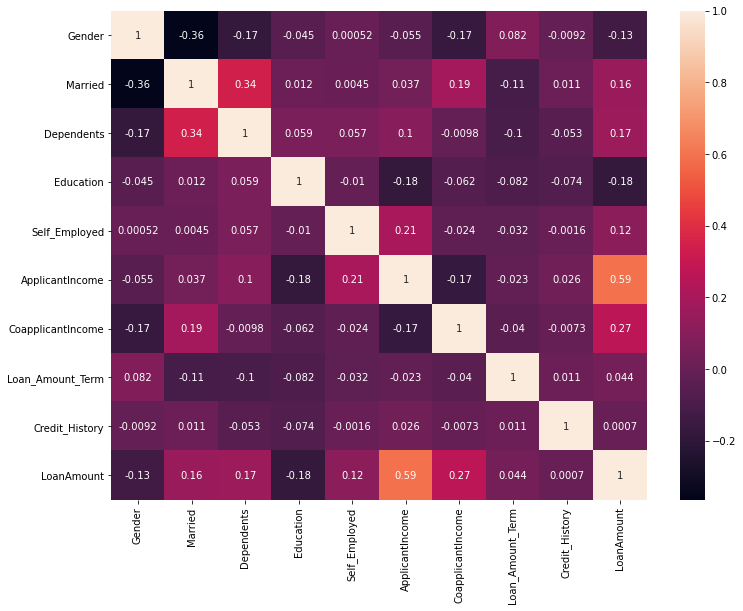

In [18]:
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Для того, чтобы выяснить какие переменные у нас самые значимые, мы построим их корреляционную матрицу и видим, что доход заявителя и со-заявителя имеют относительно всокие корреляции, также коррелируют такие факторы как, семейное положение и количество детей.

In [19]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 9].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

Выделил нужные Х и У, а затем разделил датасет на тестовый (20%) и обучающий (80%).

In [20]:
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 5:6], y_train)

Строим простую линейную регрессию зависимости от одного фактора - доход заявителя.

In [21]:
sr.coef_, sr.intercept_

(array([0.01036051]), 92.28591844277113)

Оцениваем полученные параметры.

In [22]:
y_pred = sr.predict(X_test[:, 5:6])

Строим прогноз.

In [23]:
sr.score(X_train[:, 5:6], y_train), sr.score(X_test[:, 5:6], y_test)

(0.3496104750637723, 0.3279960623380803)

Находим коэффициент детерминации, который для обучающей выборки равен 0.35, а для тестовой 0.33, что является неудовлетвориельным значением доверия и модель не может использоваться для практического применения.

In [24]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 5:6])), mean_squared_error(y_test, y_pred)

(3432.376225299781, 2617.7231699734125)

Расчитываем среднеквадратическую ошибку. Ошибка выросла, можно сделать вывод что сумма кредита, зависит не только от дохода заявителя, поэтому для более точного построения модели необходимо включить большее количество факторов, для этого необходим  построить множественную регрессию.

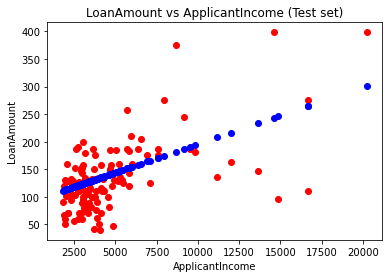

In [25]:
# Visualising the Test set results
plt.scatter(X_test[:,5], y_test, color = 'red')
plt.plot(X_test[:,5], sr.predict(X_test[:, 5:6]), 'bo')
plt.title('LoanAmount vs ApplicantIncome (Test set)')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

In [26]:
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     55.67
Date:                Mon, 28 Dec 2020   Prob (F-statistic):           5.14e-69
Time:                        19:23:45   Log-Likelihood:                -2625.7
No. Observations:                 491   AIC:                             5271.
Df Residuals:                     481   BIC:                             5313.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.1220     16.840      1.967      0.050       0.032      66.212
x1             0.3779      6.318      0.060      0.952     -12.036      12.792
x2             7.9963      5.543      1.443      0.150      -2.895      18.888
x3             7.9193      2.471      3.204      0.001       3.063      12.775
x4            -7.3250      5.790     -1.265      0.206     -18.701       4.051
x5            -8.2505      6.813     -1.211      0.226     -21.637       5.136
x6             0.0111      0.001     18.649      0.000       0.010       0.012
x7             0.0137      0.001     10.934      0.000       0.011       0.016
x8             0.0749      0.041      1.842      0.066      -0.005       0.155
x9             0.0817      6.447      0.013      0.990     -12.586      12.750
==============================================================================
Omnibus:                       54.943   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.612
Skew:                          -0.293   Prob(JB):                     1.58e-62
Kurtosis:                       6.683   Cond. No.                     4.99e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.99e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Строим множественную регрессию. Проверяем P value - делаем выводы, что 3 переменные  значимы и будем использовать их.

In [27]:
def backwardElimination(x, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

Определяем значимые переменные с погрешностью 5%.

In [28]:
mr = LinearRegression().fit(X_train, y_train)

Строим множественную регрессию на обучающей выборке.

In [29]:
mr.coef_, mr.intercept_

(array([ 0.37786248,  7.99634175,  7.91926471, -7.32497585, -8.25046555,
         0.01110744,  0.0137063 ,  0.07492242,  0.08166586]),
 33.12198805382681)

Получаем и оцениваем параметры.

In [30]:
y_pred = mr.predict(X_test)

Строим прогноз.

In [31]:
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.5102180734118571, 0.47707166516433896)

Находим коэффициент детерминации, который для обучающей выборки равен 0.51, а для тестовой 0.47, что является лучше, чем в однофакторной моделе, однако этого все равно мало и модель не может использоваться для практического применения.

In [32]:
# Mean squared error
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(2584.7830814426197, 2037.014281638926)

Среднеквадратическая ошибка выросла.

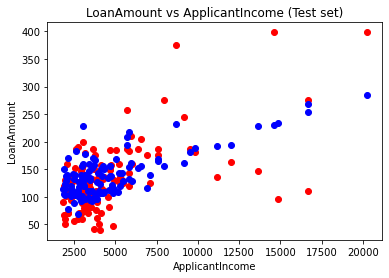

In [33]:
# Visualising the Test set results
plt.scatter(X_test[:,5], y_test, color = 'red')
plt.plot(X_test[:,5], mr.predict(X_test), 'bo')
plt.title('LoanAmount vs ApplicantIncome (Test set)')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

В принципе, типичные значения модель определяет неплохо, а вот с исключениями так не работает.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,5:], y_train)

Построим полиномиальную регрессию для нашего датасета.

In [35]:
pr.coef_, pr.intercept_

(array([-1.44741373e+07,  2.21324813e-02,  2.28288292e-02, -8.88498143e-02,
        -2.66622908e+00,  7.67727159e+01, -4.73338013e+00,  1.76751518e+01,
         1.68116666e+01,  2.58134854e+01, -2.83597173e-03, -2.22811980e-03,
        -1.76577164e-01, -1.12334655e+01, -1.74370851e+01, -8.06206254e+00,
         8.65220954e+00, -4.18850375e+00,  2.09793742e-03,  4.57330033e-03,
         5.42266320e-02, -2.69105762e-01,  5.39273020e+00,  1.07236465e-01,
         1.69054648e+01,  6.48085597e-04,  2.74851615e-03, -3.55995328e-02,
        -2.18576411e+00,  5.89050780e+01, -6.39584303e+00, -8.41715434e-04,
         1.50116946e-03, -1.75271914e-01, -7.65601796e+00,  1.44741208e+07,
        -4.17588627e-03, -3.46663502e-03,  9.46939780e-02, -9.37583369e+00,
        -4.78497906e-07, -7.38427087e-07,  1.16624016e-06, -7.64216331e-04,
        -4.49870779e-07, -1.58474941e-05, -1.80036308e-03,  3.75531538e-04,
         5.74702692e-02, -2.59047104e+00]),
 0.07773873460601521)

Получаем и оцениваем параметры.

In [36]:
y_pred = pr.predict(X_test_p[:,5:])

Строим прогноз.

In [37]:
pr.score(X_train_p[:,5:], y_train), pr.score(X_test_p[:,5:], y_test)

(0.591484644648852, 0.4148129699710722)

Находим коэффициент детерминации, который для обучающей выборки равен 0.59, а для тестовой 0.41, модель не может использоваться для практического применения.

In [38]:
mean_squared_error(y_train, pr.predict(X_train_p[:,5:])), mean_squared_error(y_test, y_pred)

(2155.905560617169, 2279.5367131394964)

Расчитываем среднеквадратическую ошибку, она также ухудшилась.

Можно сделать следующие выводы, что полиномиальная регрессия описывает модель лучше, чем однофакторная, но хуже чем множественная.

In [41]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Подключаем необходимые библиотеки для построения нейронной сети.

In [42]:
rnn = Sequential()
rnn.add(Dense(units = 16, activation = 'tanh', input_dim = 9))
rnn.add(Dense(units = 4, activation = 'tanh'))
rnn.add(Dense(units = 1, activation = 'linear'))
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

Создаём сеть RNN, она будет последовательной. На первом и втором слое берем тангенс для повышенной точности. Для последнего слоя используем линейную функцию активации и обучим нашу нейронную сеть на протяжении 100 эпох.

In [43]:
rnn.fit(X_train, y_train, batch_size = 8, epochs = 100)

Epoch 1/100
62/62 [==============================] - 0s 595us/step - loss: 1.5382 - accuracy: 0.0000e+00
Epoch 2/100
62/62 [==============================] - 0s 586us/step - loss: 1.0302 - accuracy: 0.0000e+00
Epoch 3/100
62/62 [==============================] - 0s 547us/step - loss: 0.7653 - accuracy: 0.0000e+00
Epoch 4/100
62/62 [==============================] - 0s 531us/step - loss: 0.6190 - accuracy: 0.0000e+00
Epoch 5/100
62/62 [==============================] - 0s 531us/step - loss: 0.5475 - accuracy: 0.0000e+00
Epoch 6/100
62/62 [==============================] - 0s 598us/step - loss: 0.5169 - accuracy: 0.0000e+00
Epoch 7/100
62/62 [==============================] - 0s 547us/step - loss: 0.5016 - accuracy: 0.0000e+00
Epoch 8/100
62/62 [==============================] - 0s 531us/step - loss: 0.4913 - accuracy: 0.0000e+00
Epoch 9/100
62/62 [==============================] - 0s 531us/step - loss: 0.4847 - accuracy: 0.0000e+00
Epoch 10/100
62/62 [==============================] - 0

In [44]:
y_pred = rnn.predict(X_test)

Строим прогноз.

In [45]:
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

Проводим обратное шкалирование.

In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

2501.363681213096

 Расчитываем среднеквадратическую ошибку. Ошибка практически больше, чем в полиномиальной и многофакторной регресииях. 

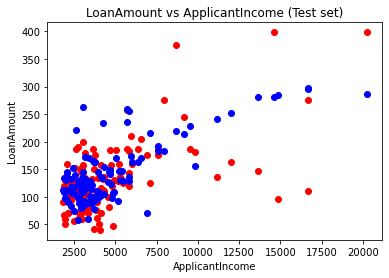

In [47]:
plt.scatter(X_test[:,5], y_test, color = 'red')
plt.plot(X_test[:,5], y_hat, 'bo')
plt.title('LoanAmount vs ApplicantIncome (Test set)')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

 Визуализируем нашу полученную модель.